# LightGBM을 사용한 ML

In [488]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [489]:
# 데이터 로드
df = pd.read_csv('../../eda/data/merged_data.csv')

In [490]:
df.head()

,기준_년분기_코드,자치구_코드_명,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_률,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,20191,강남구,PC방,122.0,132.0,9.8,13.0,6.8,9.0,10.0,...,178522.0,164466.0,100728.0,44021.0,1679.0,99408.0,108205.0,74466.0,54523.0,22838.0
1,20191,강남구,가구,435.0,436.0,2.8,12.0,0.7,3.0,1.0,...,178522.0,164466.0,100728.0,44021.0,1679.0,99408.0,108205.0,74466.0,54523.0,22838.0
2,20191,강남구,가방,279.0,280.0,4.3,12.0,3.6,10.0,1.0,...,178522.0,164466.0,100728.0,44021.0,1679.0,99408.0,108205.0,74466.0,54523.0,22838.0
3,20191,강남구,가전제품,163.0,163.0,1.8,3.0,1.2,2.0,0.0,...,178522.0,164466.0,100728.0,44021.0,1679.0,99408.0,108205.0,74466.0,54523.0,22838.0
4,20191,강남구,가전제품수리,92.0,92.0,3.3,3.0,1.1,1.0,0.0,...,178522.0,164466.0,100728.0,44021.0,1679.0,99408.0,108205.0,74466.0,54523.0,22838.0


In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39975 entries, 0 to 39974
Columns: 137 entries, 기준_년분기_코드 to 여성연령대_60_이상_직장_인구_수
dtypes: float64(132), int64(2), object(3)
memory usage: 41.8+ MB


In [492]:
df.describe()

,기준_년분기_코드,점포_수,유사_업종_점포_수,개업_률,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,당월_매출_금액,당월_매출_건수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
count,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,3.997500e+04,3.997500e+04,...,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000
mean,20220.096635,320.453959,353.995822,2.971897,11.176735,2.589829,9.794196,33.541864,1.553588e+10,5.749521e+05,...,27142.451857,26395.847330,19736.054484,9543.760350,223.790644,15057.239225,17365.139937,13473.701138,10014.440951,4391.736785
std,18.764856,624.817403,648.030094,2.385172,21.887316,2.001541,19.292389,71.256850,4.679056e+10,1.482439e+06,...,39941.977062,36960.317249,24219.922727,9600.950081,399.065330,22371.870231,24534.250632,16564.421275,11715.352615,4832.596737
min,20191.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.135000e+03,2.000000e+00,...,1169.000000,1978.000000,2704.000000,2245.000000,0.000000,635.000000,1180.000000,1674.000000,1663.000000,257.000000
25%,20203.000000,94.000000,105.000000,1.300000,2.000000,1.200000,2.000000,0.000000,1.197476e+09,1.463000e+04,...,5590.000000,5799.000000,5397.000000,3928.000000,0.000000,3138.000000,3795.000000,4042.000000,3856.000000,1695.000000
50%,20221.000000,161.000000,188.000000,2.600000,5.000000,2.300000,4.000000,4.000000,4.114511e+09,7.159500e+04,...,9123.000000,10094.000000,10122.000000,5924.000000,39.000000,5068.000000,6673.000000,6807.000000,5695.000000,2678.000000
75%,20234.000000,313.000000,357.000000,4.200000,12.000000,3.600000,10.000000,27.000000,1.251953e+10,3.641125e+05,...,24849.000000,24451.000000,18373.000000,10207.000000,209.000000,21296.000000,21114.000000,14062.000000,8866.000000,4775.000000
max,20252.000000,17827.000000,17845.000000,43.600000,773.000000,33.300000,554.000000,688.000000,1.399137e+12,2.716973e+07,...,204697.000000,188865.000000,116356.000000,51339.000000,1679.000000,114671.000000,124729.000000,86333.000000,63848.000000,26816.000000


In [493]:
# 중복 및 결측치 확인
dupes = df.duplicated(subset=["기준_년분기_코드", "자치구_코드_명", "서비스_업종_코드_명"]).sum()
df_null = df.isnull().sum()
print(f"중복된 행 개수: {dupes}")
print(f"결측치 확인: {df_null}")

중복된 행 개수: 0
결측치 확인: 기준_년분기_코드              0
자치구_코드_명               0
서비스_업종_코드_명            0
점포_수                   0
유사_업종_점포_수             0
                      ..
여성연령대_20_직장_인구_수       0
여성연령대_30_직장_인구_수       0
여성연령대_40_직장_인구_수       0
여성연령대_50_직장_인구_수       0
여성연령대_60_이상_직장_인구_수    0
Length: 137, dtype: int64


In [494]:
# "기준_년분기_코드", "자치구_코드_명", "서비스_업종_코드_명" 세 칼럼을 결합하여 새로운 식별자 컬럼 생성

# 세 칼럼을 문자열로 결합하여 새로운 식별자 컬럼 생성
df["key_id"] = (
    df["기준_년분기_코드"].astype(str) + "_" +
    df["자치구_코드_명"].astype(str) + "_" +
    df["서비스_업종_코드_명"].astype(str)
)

# 확인
print(df[["기준_년분기_코드", "자치구_코드_명", "서비스_업종_코드_명", "key_id"]].head())

   기준_년분기_코드 자치구_코드_명 서비스_업종_코드_명            key_id
0      20191      강남구         PC방     20191_강남구_PC방
1      20191      강남구          가구      20191_강남구_가구
2      20191      강남구          가방      20191_강남구_가방
3      20191      강남구        가전제품    20191_강남구_가전제품
4      20191      강남구      가전제품수리  20191_강남구_가전제품수리


In [495]:
# - 라벨: 분기별 상위 20%를 t+1로 시프트
# - 분할: 마지막 분기 = 테스트, 나머지 = 학습
# - 전처리: 숫자 + (자치구/업종/상권지표)만 간단 사용
# - 평가지표: ROC-AUC, PR-AUC, 간단 중요도

from pathlib import Path
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, average_precision_score

# 0) 데이터 경로
DATA_FILE = Path("../../eda/data/merged_data.csv")

# 1) 로드 (인코딩 안전장치)
def load_csv(path: Path):
    for enc in ["utf-8-sig","cp949","utf-8"]:   # 파일이 깨지는 걸 방지.
        try:
            return pd.read_csv(path, low_memory=False, encoding=enc)
        except Exception:
            pass
    return pd.read_csv(path, low_memory=False)
df = load_csv(DATA_FILE)
print(df.shape)                      # 정상 로드 확인.

(39975, 137)


In [496]:
# 불필요한 칼럼 제거
df = df.drop(columns=["폐업_점포_수", "운영_영업_개월_평균", "폐업_영업_개월_평균", "서울시_운영_영업_개월_평균", "서울시_폐업_영업_개월_평균"])

In [497]:
# 2) 키 & 핵심 컬럼 이름
KEY_Q = "기준_년분기_코드"
KEY_G = "자치구_코드_명"
KEY_S = "서비스_업종_코드_명"
TARGET_CONT = "폐업_률"         # 분류 라벨의 기준 컬럼

In [498]:
# 3) 정렬 & 라벨(t+1): 분기별 상위 20%를 다음 분기 라벨로
# 폐업 위험 여부(이진 라벨)를 만들기 위한 단계
df = df.sort_values([KEY_G, KEY_S, KEY_Q]).copy()
q80 = df.groupby(KEY_Q)[TARGET_CONT].quantile(0.75).rename("thr")   # 분기별 80% 분위수
df = df.merge(q80, left_on=KEY_Q, right_index=True, how="left")
df["is_high_t"] = (df[TARGET_CONT] >= df["thr"]).astype(int)
df["y"] = df.groupby([KEY_G, KEY_S])["is_high_t"].shift(-1)
df = df[df["y"].notna()].copy()
df["y"] = df["y"].astype(int)

- 계절성·트렌드에 강함: 분기별 상대 기준(상위 20%)으로 컷팅 → 특정 분기에 전체 폐업률이 높아도 라벨 비율은 안정.
- 운영 시나리오와 일치: t에서 t+1을 예측 → 미래 예측 구조.
- 라벨 불균형이 과도하지 않음: 분기마다 대략 20% 수준으로 유지(테스트 분기에도 양성이 거의 항상 존재).

In [499]:
# 4) 간단 피처 선택
# 학습에 넣을 X(입력 피처)와 y(라벨)를 확정
base_exclude = {TARGET_CONT, "thr", "is_high_t", "y"}
num_cols = df.select_dtypes(include=[np.number]).columns.difference(base_exclude).tolist()

cat_cols = [c for c in ["자치구_코드_명","서비스_업종_코드_명","상권_변화_지표"] if c in df.columns]
for c in cat_cols:
    df[c] = df[c].astype("category")

feature_cols = num_cols + cat_cols
X = df[feature_cols]
y = df["y"]

In [500]:
# 5) 분할: 마지막 분기 = 테스트, 나머지 = 학습
quarters = sorted(df[KEY_Q].unique())
test_q = quarters[-1]
train_idx = df[df[KEY_Q] != test_q].index
test_idx  = df[df[KEY_Q] == test_q].index

X_tr, y_tr = X.loc[train_idx], y.loc[train_idx]
X_te, y_te = X.loc[test_idx],  y.loc[test_idx]
print(f"Train: {X_tr.shape}, Test(latest {test_q}): {X_te.shape}")

Train: (36890, 131), Test(latest 20251): (1529, 131)


In [501]:
# 6) LightGBM 분류(간단 파라미터)
model = lgb.LGBMClassifier(
    objective="binary",
    boosting="gbdt",          # 비교용으로 "dart"도 시도 가능(dart 테스트 결과 성능이 더 안 좋음)
    learning_rate=0.01,       # 0.01~0.1 범위 추천
    n_estimators=5000,        # early_stopping과 함께 사용 권장
    num_leaves=35,            # 31~63 범위 추천
    max_depth=12,             # -1 대신 8~12 범위 시험
    min_data_in_leaf=200,     # 100~300 범위 추천  
    reg_alpha=2.0,            # L1 규제(1~5)
    min_split_gain=0.05,      # 미세 분할 억제
    class_weight={0:1.0, 1:3.0},  # 불균형 완화(완화하려면 수동 가중치로 조정)
    n_jobs=-1,                # CPU 코어 최대한 활용

    # ==== alias 값 일치시키기 ==== (경고 메세지 방지)
    feature_fraction=0.8,   colsample_bytree=0.8,   # 0.7~0.85
    bagging_fraction=0.9,   subsample=0.9,          # 0.7~0.9
    bagging_freq=1,         subsample_freq=1,       # 1~5

    min_child_samples=50,
    reg_lambda=8.0,         # (= lambda_l2 와 동의어 → 하나만 유지)
    verbosity=-1,           # 정보 로그 줄이기(선택)
)

model.fit(
    X_tr, y_tr,
    eval_set=[(X_te, y_te)],
    eval_metric=["auc","average_precision"],
    categorical_feature=[c for c in cat_cols if c in X.columns],
    callbacks=[lgb.early_stopping(100, verbose=False)]
)

LGBMClassifier(bagging_fraction=0.9, bagging_freq=1, boosting='gbdt',
               class_weight={0: 1.0, 1: 3.0}, colsample_bytree=0.8,
               feature_fraction=0.8, learning_rate=0.01, max_depth=12,
               min_child_samples=50, min_data_in_leaf=200, min_split_gain=0.05,
               n_estimators=5000, n_jobs=-1, num_leaves=35, objective='binary',
               reg_alpha=2.0, reg_lambda=8.0, subsample=0.9, subsample_freq=1,
               verbosity=-1)

In [502]:
# 7) 평가
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    accuracy_score, precision_score, recall_score, f1_score
)

pred_prob = model.predict_proba(X_te)[:, 1]

# 임계값(필요시 0.5 → 다른 값으로 조정)
thr = 0.6
pred_label = (pred_prob >= thr).astype(int)

def safe_acc(y_true, y_pred):
    return accuracy_score(y_true, y_pred) if y_true.nunique() > 1 else np.nan

def safe_prec(y_true, y_pred):
    return precision_score(y_true, y_pred, zero_division=0) if y_true.nunique() > 1 else np.nan

def safe_rec(y_true, y_pred):
    return recall_score(y_true, y_pred, zero_division=0) if y_true.nunique() > 1 else np.nan

def safe_f1(y_true, y_pred):
    return f1_score(y_true, y_pred, zero_division=0) if y_true.nunique() > 1 else np.nan

def safe_auc(y_true, y_prob):
    return roc_auc_score(y_true, y_prob) if y_true.nunique() > 1 else np.nan

def safe_ap(y_true, y_prob):
    return average_precision_score(y_true, y_prob) if y_true.nunique() > 1 else np.nan

print(f"ACC     : {safe_acc(y_te, pred_label):.4f}")
print(f"PREC    : {safe_prec(y_te, pred_label):.4f}")
print(f"RECALL  : {safe_rec(y_te, pred_label):.4f}")
print(f"F1      : {safe_f1(y_te, pred_label):.4f}")
print(f"ROC-AUC : {safe_auc(y_te, pred_prob):.4f}")
print(f"PR-AUC  : {safe_ap(y_te, pred_prob):.4f}")

ACC     : 0.8044
PREC    : 0.6022
RECALL  : 0.6931
F1      : 0.6445
ROC-AUC : 0.8605
PR-AUC  : 0.7108


In [503]:
# 8) 중요도 TOP 15
imp = pd.DataFrame({
    "feature": X.columns,
    "gain": model.booster_.feature_importance(importance_type="gain")
}).sort_values("gain", ascending=False)
print("\n[중요도 TOP 15]")
display(imp.head(15))


[중요도 TOP 15]


,feature,gain
129,서비스_업종_코드_명,860327.082890
128,자치구_코드_명,65791.318421
47,시간대_건수~06_매출_건수,40012.655895
0,개업_률,22678.823686
7,기준_년분기_코드,19479.574639
115,점포_수,19424.587071
106,유사_업종_점포_수,12708.623597
37,시간대_06_11_매출_금액,10586.020573
52,시간대_건수~24_매출_건수,8327.600616
124,프랜차이즈_점포_수,8327.324359


In [504]:
# 중요도 TOP 15 (%로 환산)
imp["gain_pct"] = 100 * imp["gain"] / imp["gain"].sum()
display(imp.head(15)[["feature","gain","gain_pct"]])

,feature,gain,gain_pct
129,서비스_업종_코드_명,860327.082890,69.284199
128,자치구_코드_명,65791.318421,5.298332
47,시간대_건수~06_매출_건수,40012.655895,3.222315
0,개업_률,22678.823686,1.826380
7,기준_년분기_코드,19479.574639,1.568737
115,점포_수,19424.587071,1.564308
106,유사_업종_점포_수,12708.623597,1.023456
37,시간대_06_11_매출_금액,10586.020573,0.852518
52,시간대_건수~24_매출_건수,8327.600616,0.670642
124,프랜차이즈_점포_수,8327.324359,0.670619


- 모델이 학습 중 분할에 사용한 피처들 중, 손실 감소(=성능 개선)에 많이 기여한 순서를 파악

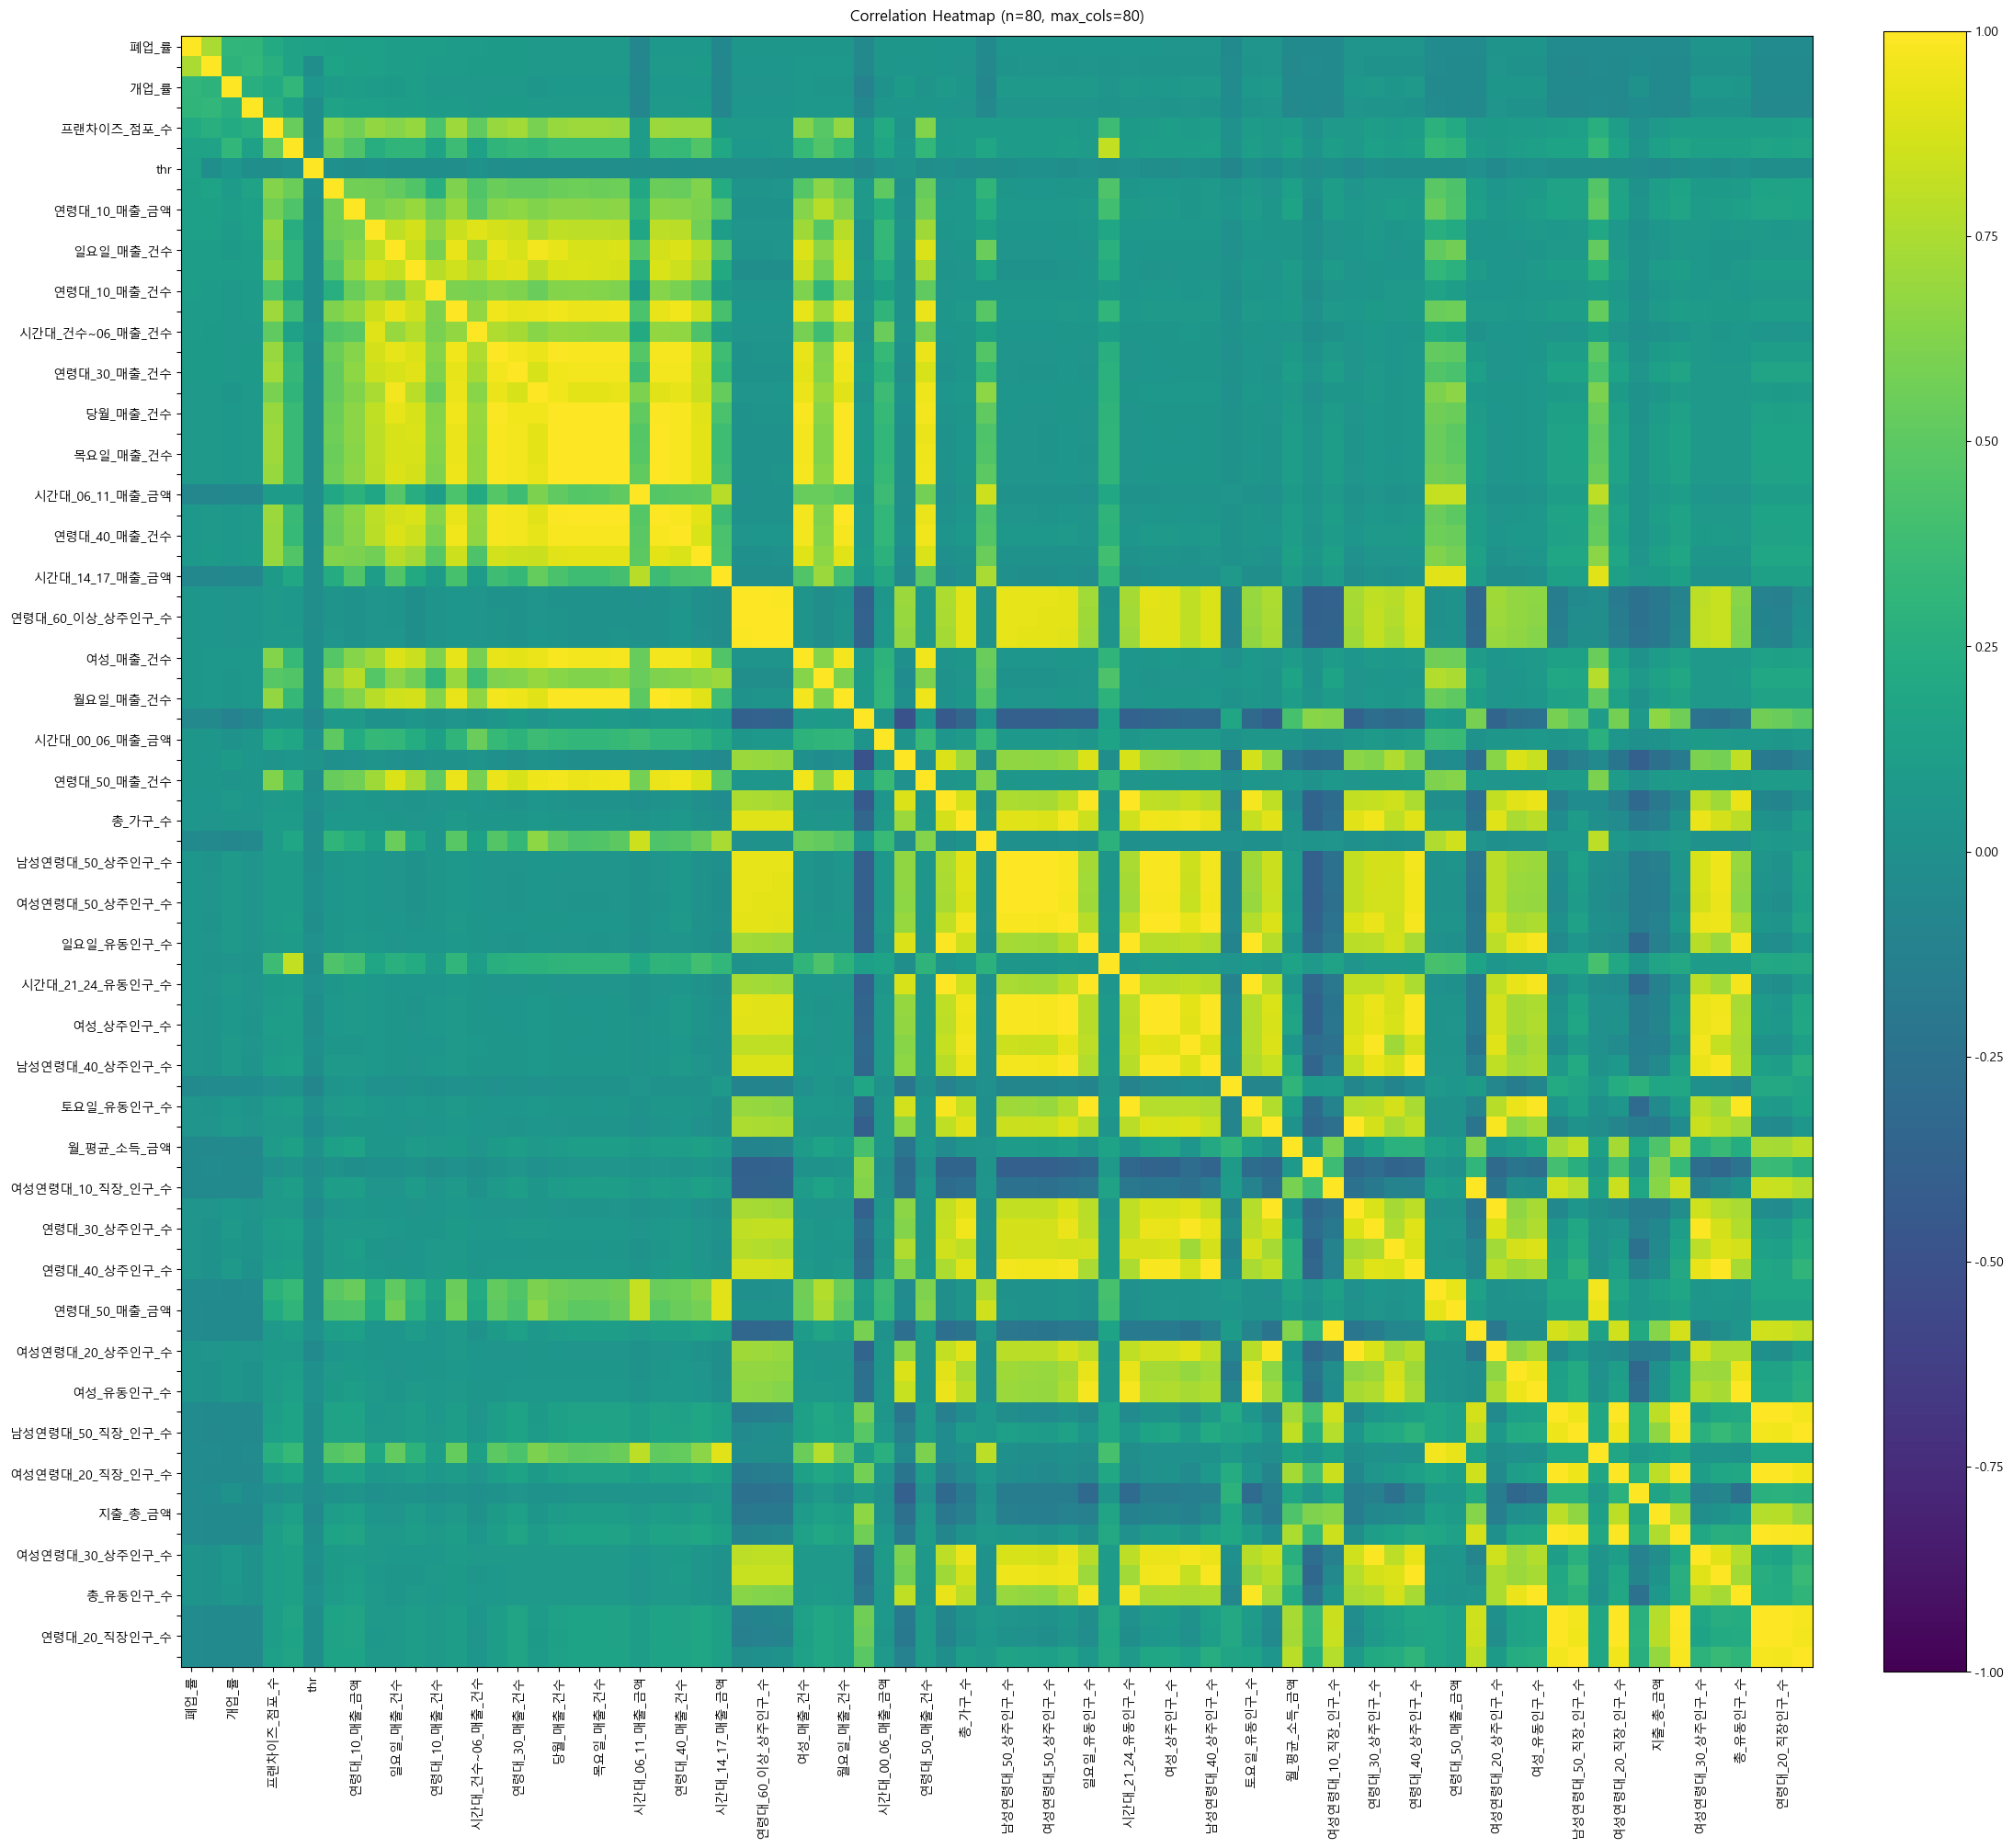

⚠️ |corr| ≥ 0.95 고상관 쌍 (일부):
  - 일요일_매출_건수 vs 토요일_매출_건수: 0.966
  - 시간대_건수~21_매출_건수 vs 남성_매출_건수: 0.957
  - 시간대_건수~21_매출_건수 vs 당월_매출_건수: 0.960
  - 시간대_건수~21_매출_건수 vs 연령대_40_매출_건수: 0.954
  - 남성_매출_건수 vs 연령대_30_매출_건수: 0.964
  - 남성_매출_건수 vs 당월_매출_건수: 0.985
  - 남성_매출_건수 vs 수요일_매출_건수: 0.977
  - 남성_매출_건수 vs 목요일_매출_건수: 0.977
  - 남성_매출_건수 vs 금요일_매출_건수: 0.980
  - 남성_매출_건수 vs 화요일_매출_건수: 0.974


In [505]:
# =========================
# Correlation Heatmap (matplotlib only)
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["font.family"] = "Malgun Gothic"   # 윈도우 기본 한글 폰트
mpl.rcParams["axes.unicode_minus"] = False      # 마이너스 기호 깨짐 방지


# 타깃 컬럼명 (노트북에 이미 TARGET_CONT가 있다면 그 값을 사용)
TARGET = "폐업_률"
if "TARGET_CONT" in globals():
    TARGET = TARGET_CONT

def plot_corr_heatmap(df, max_cols=80, include_target=True):
    """
    df: DataFrame (이미 로드된 df)
    max_cols: 히트맵에 표시할 최대 컬럼 수 (너무 많으면 읽기 어렵기 때문에 제한)
    include_target: 타깃을 포함해서 '타깃과 상관 높은 순' 우선 선별
    """
    # 1) 수치형 컬럼만 사용
    num_cols_all = df.select_dtypes(include=[np.number]).columns.tolist()
    if include_target and TARGET in df.columns and TARGET not in num_cols_all:
        # (혹시 object로 들어온 경우를 대비)
        try:
            df[TARGET] = pd.to_numeric(df[TARGET], errors="coerce")
            if df[TARGET].dtype.kind in "ifc":
                num_cols_all.append(TARGET)
        except Exception:
            pass

    # (방어) 상수열 제거
    stable = [c for c in num_cols_all if df[c].nunique(dropna=True) > 1]

    # 2) 너무 많으면 컬럼 선별 (타깃 기반 → 상관 높은 순)
    cols = stable
    if len(stable) > max_cols:
        if include_target and TARGET in stable:
            # 타깃과의 상관 절대값 상위 (타깃 제외한 뒤 뽑고 타깃 포함)
            corr_with_t = df[stable].corr().abs()[TARGET].drop(labels=[TARGET]).sort_values(ascending=False)
            top = corr_with_t.head(max_cols - 1).index.tolist()
            cols = [TARGET] + top
        else:
            # 타깃이 없으면 분산 큰 순으로 선별
            var = df[stable].var().sort_values(ascending=False)
            cols = var.head(max_cols).index.tolist()

    # 3) 상관계수 계산 (피어슨)
    corr = df[cols].corr(method="pearson")

    # 4) 히트맵 그리기 (라벨 간격 조절)
    n = len(cols)
    fig_size = max(8, min(0.35 * n, 22))  # 너무 크지 않게 제한
    plt.figure(figsize=(fig_size, fig_size))
    im = plt.imshow(corr.values, vmin=-1, vmax=1, interpolation="nearest")
    plt.colorbar(im, fraction=0.046, pad=0.04)

    # 축 라벨 간격 줄이기
    step = max(1, n // 30)  # 대략 30개 정도만 라벨 보이게
    xlabels = [cols[i] if i % step == 0 else "" for i in range(n)]
    ylabels = [cols[i] if i % step == 0 else "" for i in range(n)]
    plt.xticks(ticks=np.arange(n), labels=xlabels, rotation=90)
    plt.yticks(ticks=np.arange(n), labels=ylabels)

    plt.title(f"Correlation Heatmap (n={n}, max_cols={max_cols})", pad=12)
    plt.tight_layout()
    plt.show()

    # 5) (선택) 고상관 경고 출력
    high_pairs = []
    thr = 0.95
    C = corr.values
    for i in range(n):
        for j in range(i+1, n):
            if np.isfinite(C[i, j]) and abs(C[i, j]) >= thr:
                high_pairs.append((cols[i], cols[j], C[i, j]))
    if high_pairs:
        print(f"⚠️ |corr| ≥ {thr} 고상관 쌍 (일부):")
        for a, b, v in high_pairs[:10]:
            print(f"  - {a} vs {b}: {v:.3f}")

# === 사용 예시 ===
# 전체 수치 컬럼 기준 러프 히트맵(최대 80개, 타깃 포함 우선 선별)
plot_corr_heatmap(df, max_cols=80, include_target=True)


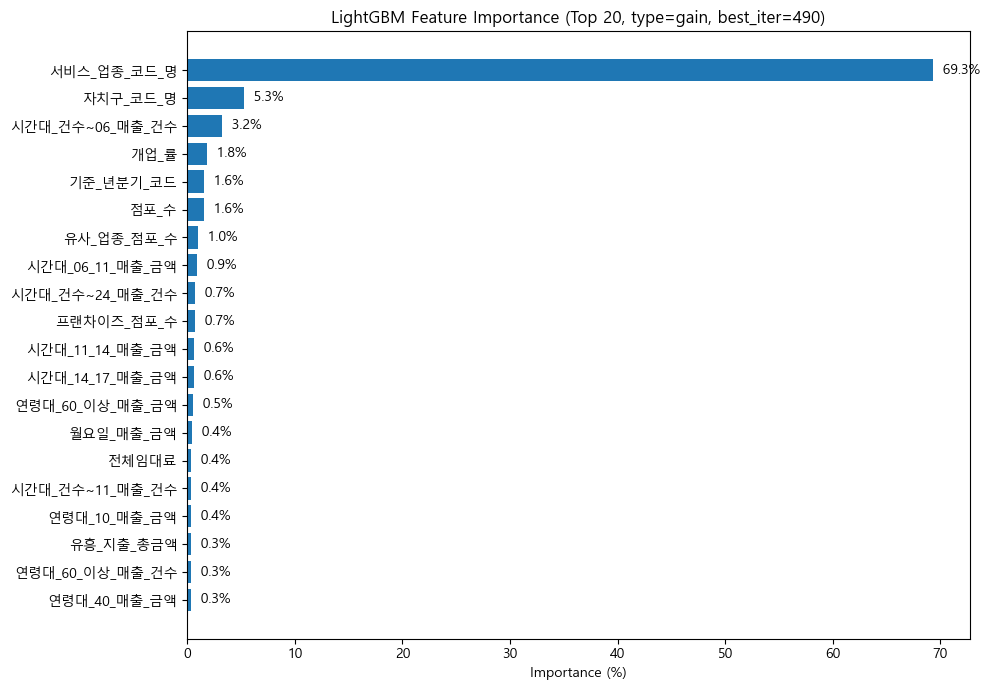

,feature,importance,value
129,서비스_업종_코드_명,860327.082890,69.284199
128,자치구_코드_명,65791.318421,5.298332
47,시간대_건수~06_매출_건수,40012.655895,3.222315
0,개업_률,22678.823686,1.826380
7,기준_년분기_코드,19479.574639,1.568737
115,점포_수,19424.587071,1.564308
106,유사_업종_점포_수,12708.623597,1.023456
37,시간대_06_11_매출_금액,10586.020573,0.852518
52,시간대_건수~24_매출_건수,8327.600616,0.670642
124,프랜차이즈_점포_수,8327.324359,0.670619


In [506]:
# LightGBM Feature Importance (Top-N, matplotlib)
def plot_lgbm_importance(model, feature_names, top_n=20, importance_type="gain", normalize=True):
    """
    model          : 학습된 lgb.LGBMClassifier / LGBMRegressor
    feature_names  : X.columns
    top_n          : 표시할 상위 개수
    importance_type: "gain" 또는 "split"
    normalize      : 합계 100%로 정규화해 %로 표시할지 여부
    """
    # Booster 가져오기 (버전 호환)
    booster = getattr(model, "booster_", None) or getattr(model, "_Booster", None)
    assert booster is not None, "학습된 모델의 booster를 찾을 수 없습니다."

    best_iter = getattr(model, "best_iteration_", None)
    try:
        imp_raw = booster.feature_importance(importance_type=importance_type, iteration=best_iter)
    except TypeError:
        # 일부 버전에선 iteration 인자가 없음
        imp_raw = booster.feature_importance(importance_type=importance_type)

    imp_df = pd.DataFrame({"feature": list(feature_names), "importance": imp_raw})

    # 정규화(선택)
    if normalize and imp_df["importance"].sum() > 0:
        imp_df["value"] = 100 * imp_df["importance"] / imp_df["importance"].sum()
        xlab = "Importance (%)"
        fmt = "{:.1f}%"
    else:
        imp_df["value"] = imp_df["importance"]
        xlab = "Importance"
        fmt = "{:.0f}"

    # Top-N만 추려서 그래프 (barh는 내림차순 → 역순 정렬)
    top = (imp_df.sort_values("value", ascending=False)
                 .head(top_n)
                 .iloc[::-1])

    fig_h = max(5, 0.35 * len(top))   # 피처 개수에 비례해 높이 조정
    plt.figure(figsize=(10, fig_h))
    plt.barh(top["feature"], top["value"])
    title = f"LightGBM Feature Importance (Top {top_n}, type={importance_type}"
    if best_iter:
        title += f", best_iter={best_iter}"
    title += ")"
    plt.title(title)
    plt.xlabel(xlab)
    # 값 라벨
    for i, v in enumerate(top["value"]):
        plt.text(v, i, "  " + fmt.format(v), va="center")
    plt.tight_layout()
    plt.show()

    return top.iloc[::-1][["feature", "importance", "value"]]  # 상위부터 반환

# === 사용 예시 ===
# gain 기준 Top 20
imp_top20 = plot_lgbm_importance(model, X.columns, top_n=20, importance_type="gain", normalize=True)
display(imp_top20)